<style type="text/css">
table td{
border:none;
}
</style>

<table>
    <tr>
        <td width=15%><img src="../img/logoIGE_Color_Light.jpg"></img></td>
        <td>
            <center>
                <h1>Machine Learning for prediciting RX localization</h1> <br>
                May - July 2022 <br>
                IGE internship
            </center>
            Renan MANCEAUX <br>
            Supervisor :<br>
            Thomas CHAUVE
        </td>
        <td width=20%><img src="../img/logo_UGA_imag.png"></img></td>
    </tr>
</table>

<center><h1> Exploration : Dimensional reduction </h1></center>

----------------------------

# Principal Components Analysis (PCA) on initial dataset

Exploration process before apply machine learning to craft data.
Linear reduction of dimensions based on "least square" algorithm and projection 
into easyer representativ space made by linear combinations of variables.

### Import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns


import sys
sys.path.append("../")
import utils


from sklearn.decomposition import PCA

### Loading data

In [3]:
CI02 = utils.load_data("../data/for_learning/CI02.npy")
CI04 = utils.load_data("../data/for_learning/CI04.npy")
CI06 = utils.load_data("../data/for_learning/CI06.npy")
CI09 = utils.load_data("../data/for_learning/CI09.npy")
CI21 = utils.load_data("../data/for_learning/CI21.npy")

CI02['batch'] = ['CI02'] * np.shape(CI02)[0]
CI04['batch'] = ['CI04'] * np.shape(CI04)[0]
CI06['batch'] = ['CI06'] * np.shape(CI06)[0]
CI09['batch'] = ['CI09'] * np.shape(CI09)[0]
CI21['batch'] = ['CI21'] * np.shape(CI21)[0]

## PCA 

### Variables selection 

In [68]:
data = pd.concat((CI02,CI04,CI06,CI09,CI21))
data['Y'] = data['Y'].astype(int)
data['batch'] = data['batch'].astype(object)
X = data.loc[:,((data.columns != 'Y')&(data.columns != 'batch'))] 
y = data['Y']
b = data['batch'] 

### Normalization

In [5]:
norm_X = (X - X.mean())/X.std()

### Apply PCA

In [6]:
pca = PCA()
res_pca  = pca.fit(norm_X)

## Results

### Eigen values / Explained variance ratio

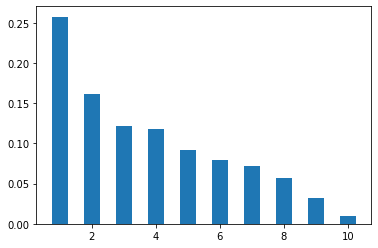

In [7]:
plt.bar(np.linspace(1,10,10),res_pca.explained_variance_ratio_,width=0.5)
plt.show()

### First Principal plan

In [65]:
components = pca.fit_transform(norm_X)

PCDf = pd.DataFrame(data = components
             , columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5','PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10'])

colors_lab = {1:'red', 0 :'blue'}

colors_batch = {'CI02':'red', 'CI04':'green', 'CI06':'blue', 'CI09':'yellow', 'CI21':'black'}


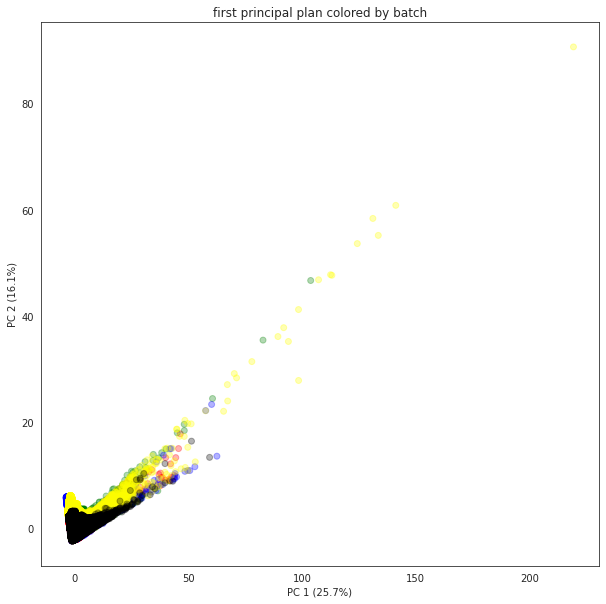

In [63]:
plt.figure(figsize=(10,10))
plt.scatter(components.T[0],components.T[1],alpha=0.3,color = b.map(colors_batch))
plt.xlabel(f"PC 1 ({(pca.explained_variance_ratio_[0] * 100):.1f}%)")
plt.ylabel(f"PC 2 ({(pca.explained_variance_ratio_[1] * 100):.1f}%)")
plt.title('first principal plan colored by batch')
plt.show()

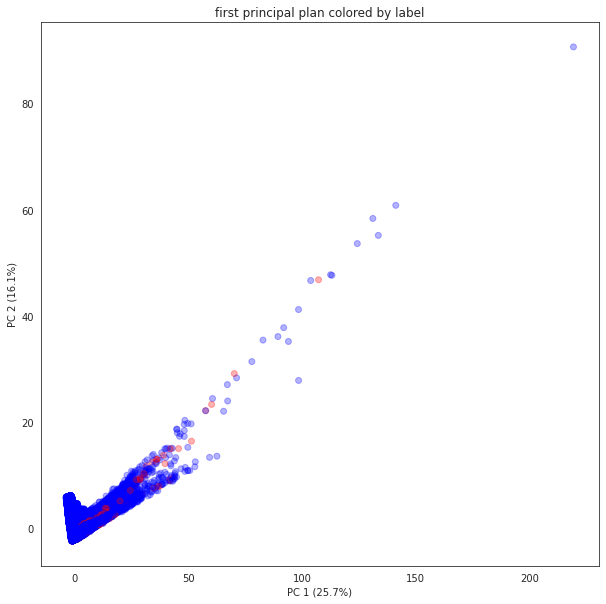

In [69]:
plt.figure(figsize=(10,10))
plt.scatter(components.T[0],components.T[1],alpha=0.3,color = y.map(colors_lab))
plt.xlabel(f"PC 1 ({(pca.explained_variance_ratio_[0] * 100):.1f}%)")
plt.ylabel(f"PC 2 ({(pca.explained_variance_ratio_[1] * 100):.1f}%)")
plt.title('first principal plan colored by label')
plt.show()

### Individuals on 1-4 components

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.scatter(components.T[0],components.T[1],alpha=0.3,color = b.map(colors_batch))
plt.xlabel(f"PC 1 ({(pca.explained_variance_ratio_[0] * 100):.1f}%)")
plt.ylabel(f"PC 2 ({(pca.explained_variance_ratio_[1] * 100):.1f}%)")
plt.title('first principal plane colored by batch')

plt.subplot(222)
plt.scatter(components.T[2],components.T[3],alpha=0.3,color = b.map(colors_batch))
plt.xlabel(f"PC 3 ({(pca.explained_variance_ratio_[2] * 100):.1f}%)")
plt.ylabel(f"PC 4 ({(pca.explained_variance_ratio_[3] * 100):.1f}%)")
plt.title('second principal plane colored by batch')

plt.subplot(223)
plt.scatter(components.T[0],components.T[1],alpha=0.3,color = y.map(colors_lab))
plt.xlabel(f"PC 1 ({(pca.explained_variance_ratio_[0] * 100):.1f}%)")
plt.ylabel(f"PC 2 ({(pca.explained_variance_ratio_[1] * 100):.1f}%)")
plt.title('first principal plane colored by label')

plt.subplot(224)
plt.scatter(components.T[2],components.T[3],alpha=0.3,color = y.map(colors_lab))
plt.xlabel(f"PC 3 ({(pca.explained_variance_ratio_[2] * 100):.1f}%)")
plt.ylabel(f"PC 4 ({(pca.explained_variance_ratio_[3] * 100):.1f}%)")
plt.title('second principal plane colored by label')

plt.show()

### Density maps

In [46]:
import warnings
warnings.filterwarnings('ignore')

df = PCDf[['PC 1','PC 2']]
df['batch'] = np.array(b)
df['RX'] = np.array(y)

In [47]:
CP_CI02 = df.where(df.batch=='CI02').dropna()
CP_CI04 = df.where(df.batch=='CI04').dropna()
CP_CI06 = df.where(df.batch=='CI06').dropna()
CP_CI09 = df.where(df.batch=='CI09').dropna()
CP_CI21 = df.where(df.batch=='CI21').dropna()

In [39]:
def filt(x,y, bins):
    x = np.array(x)
    y = np.array(y)

    d = np.digitize(x, bins)
    xfilt = []
    yfilt = []
    for i in np.unique(d):
        xi = x[d == i]
        yi = y[d == i]
        if len(xi) <= 2:
            xfilt.extend(list(xi))
            yfilt.extend(list(yi))
        else:
            xfilt.extend([xi[np.argmax(yi)], xi[np.argmin(yi)]])
            yfilt.extend([yi.max(), yi.min()])
    # prepend/append first/last point if necessary
    if x[0] != xfilt[0]:
        xfilt = [x[0]] + xfilt
        yfilt = [y[0]] + yfilt
    if x[-1] != xfilt[-1]:
        xfilt.append(x[-1])
        yfilt.append(y[-1])
    sort = np.argsort(xfilt)
    return np.array(xfilt)[sort], np.array(yfilt)[sort]

In [55]:
sns.set_style("white")
plt.figure(figsize=(20,10))
plt.subplot(231)

x = CP_CI02['PC 1']
y = CP_CI02['PC 2']
bins = np.linspace(x.min(),x.max(),301)
xf, yf = filt(x,y,bins) 
sns.kdeplot(x=xf, y=yf, cmap="Reds", shade=True)
plt.xlim([-10,60])
plt.ylim([-15,30])
plt.title("CI02")

plt.subplot(232)

x = CP_CI04['PC 1']
y = CP_CI04['PC 2']
bins = np.linspace(x.min(),x.max(),301)
xf, yf = filt(x,y,bins) 
sns.kdeplot(x=xf, y=yf, cmap="Blues", shade=True)
plt.xlim([-10,60])
plt.ylim([-15,30])
plt.title("CI04")

plt.subplot(233)

x = CP_CI06['PC 1']
y = CP_CI06['PC 2']
bins = np.linspace(x.min(),x.max(),301)
xf, yf = filt(x,y,bins) 
sns.kdeplot(x=xf, y=yf, cmap="Greens", shade=True)
plt.xlim([-10,60])
plt.ylim([-15,30])
plt.title("CI06")

plt.subplot(234)

x = CP_CI09['PC 1']
y = CP_CI09['PC 2']
bins = np.linspace(x.min(),x.max(),301)
xf, yf = filt(x,y,bins) 
sns.kdeplot(x=xf, y=yf, cmap="Oranges", shade=True)
plt.xlim([-10,60])
plt.ylim([-15,30])
plt.title("CI09")

plt.subplot(235)

x = CP_CI21['PC 1']
y = CP_CI21['PC 2']
bins = np.linspace(x.min(),x.max(),301)
xf, yf = filt(x,y,bins) 
sns.kdeplot(x=xf, y=yf, cmap="Greys", shade=True)
plt.xlim([-10,60])
plt.ylim([-15,30])
plt.title("CI21")

plt.show()

In [56]:
CP_y0 = df.where(df.RX==0).dropna()
CP_y1 = df.where(df.RX==1).dropna()

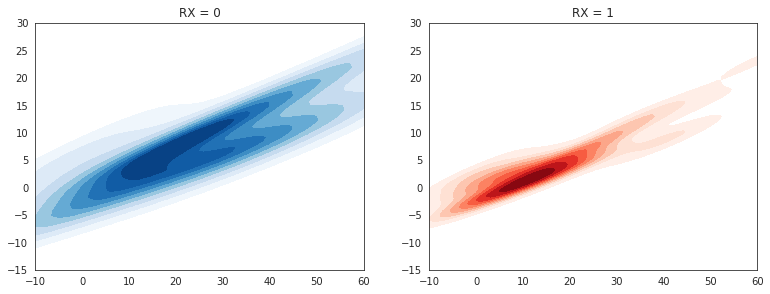

In [62]:
sns.set_style("white")
plt.figure(figsize=(20,10))
plt.subplot(231)

x = CP_y0['PC 1']
y = CP_y0['PC 2']
bins = np.linspace(x.min(),x.max(),301)
xf, yf = filt(x,y,bins) 
sns.kdeplot(x=xf, y=yf, cmap="Blues", shade=True)
plt.xlim([-10,60])
plt.ylim([-15,30])
plt.title("RX = 0")

plt.subplot(232)

x = CP_y1['PC 1']
y = CP_y1['PC 2']
bins = np.linspace(x.min(),x.max(),301)
xf, yf = filt(x,y,bins) 
sns.kdeplot(x=xf, y=yf, cmap="Reds", shade=True)
plt.xlim([-10,60])
plt.ylim([-15,30])
plt.title("RX = 1")

plt.show()

### Correlation cirle on components 1-2, 3-4 and 5-6

In [7]:
n = np.shape(norm_X)[0]
p = np.shape(norm_X)[1]
eigval = (n-1)/n*pca.explained_variance_
sqrt_eigval = np.sqrt(eigval)
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]

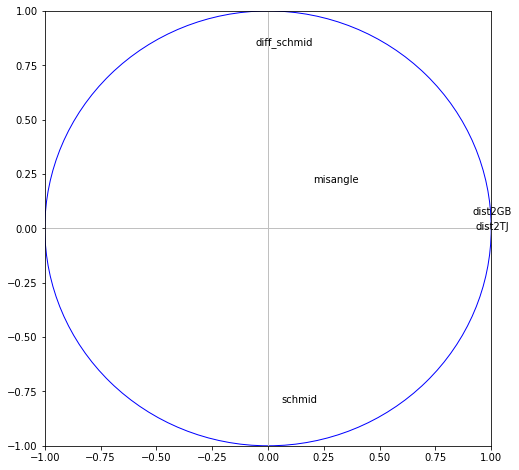

In [8]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.show()

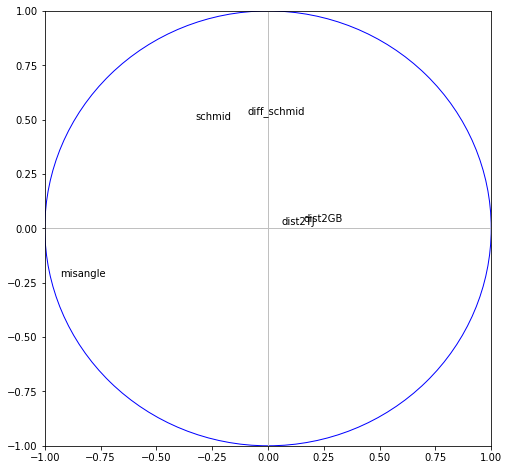

In [14]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,2],corvar[j,3]))

plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.show()

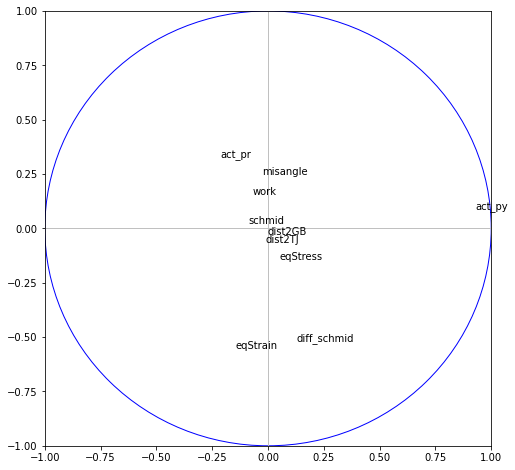

In [13]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,4],corvar[j,5]))

plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.show()